In [1]:
import os
import pandas as pd
from scipy import stats

In [2]:
file_path = os.path.join("CSV_folder", "chymotrypsin_kinetics.csv")
print(file_path)

CSV_folder\chymotrypsin_kinetics.csv


In [10]:
chy_kin_df = pd.read_csv(file_path)
chy_kin_df.head()

,Time (sec),1,0.5,0.25,0.125,0.0625,0.03125,0.015625,0.0078125,0.00390625,0.00195313
0,0,0.584,0.380,0.244,0.181,0.136,0.115,0.001,0.051,0.006,-0.029
1,10,0.589,0.385,0.249,0.185,0.141,0.121,0.005,0.054,0.008,-0.028
2,20,0.595,0.390,0.254,0.190,0.146,0.125,0.009,0.057,0.010,-0.027
3,30,0.600,0.400,0.259,0.194,0.151,0.130,0.013,0.059,0.011,-0.026
4,40,0.606,0.401,0.264,0.199,0.156,0.135,0.016,0.061,0.012,-0.025


In [11]:
chy_kin_df.set_index("Time (sec)", inplace = True)
chy_kin_df.head()

,1,0.5,0.25,0.125,0.0625,0.03125,0.015625,0.0078125,0.00390625,0.00195313
Time (sec),,,,,,,,,,
0,0.584,0.380,0.244,0.181,0.136,0.115,0.001,0.051,0.006,-0.029
10,0.589,0.385,0.249,0.185,0.141,0.121,0.005,0.054,0.008,-0.028
20,0.595,0.390,0.254,0.190,0.146,0.125,0.009,0.057,0.010,-0.027
30,0.600,0.400,0.259,0.194,0.151,0.130,0.013,0.059,0.011,-0.026
40,0.606,0.401,0.264,0.199,0.156,0.135,0.016,0.061,0.012,-0.025


In [12]:
chy_kin_df.index.dtype

dtype('int64')

<Axes: xlabel='Time (sec)'>

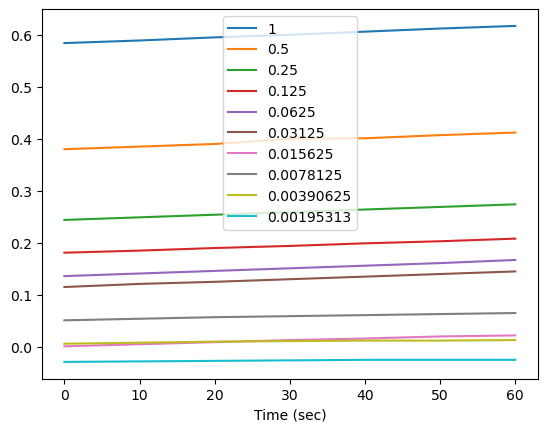

In [13]:
chy_kin_df.plot()

<Axes: xlabel='Time (sec)'>

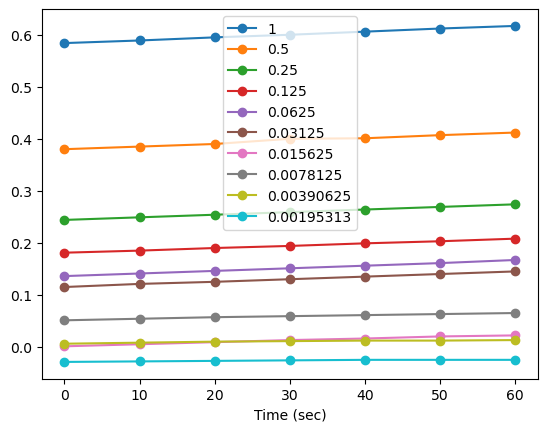

In [14]:
chy_kin_df.plot(marker= 'o')

<Axes: xlabel='Time (sec)'>

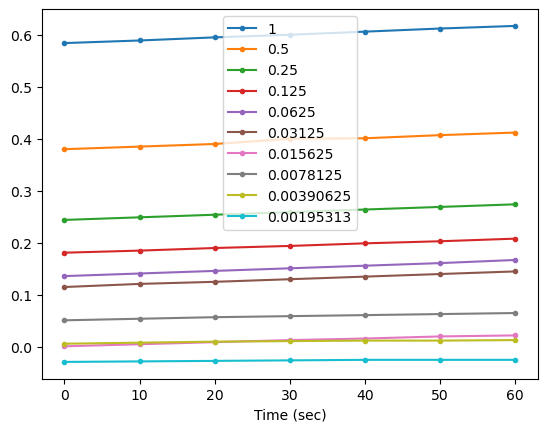

In [15]:
chy_kin_df.plot(marker = ".")

<Axes: xlabel='Time (sec)'>

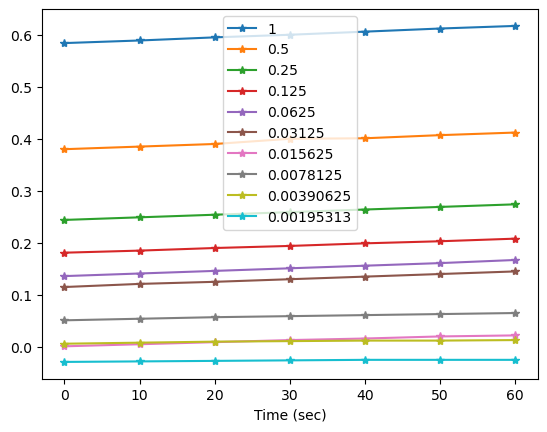

In [16]:
chy_kin_df.plot(marker = '*')

In [17]:
mm_df = pd.DataFrame()
mm_df["[pNPA] (mM)"] = chy_kin_df.columns
mm_df

,[pNPA] (mM)
0,1
1,0.5
2,0.25
3,0.125
4,0.0625
5,0.03125
6,0.015625
7,0.0078125
8,0.00390625
9,0.00195313


In [18]:
slopes = []
for column in chy_kin_df.columns:
    slope, _, _, _, _ = stats.linregress(chy_kin_df.index, chy_kin_df[column])
    slopes.append(slope)
    
slopes

[0.0005571428571428576,
 0.0005392857142857137,
 0.0005000000000000004,
 0.00045000000000000004,
 0.0005107142857142859,
 0.0004928571428571429,
 0.00035714285714285714,
 0.0002285714285714286,
 0.00011071428571428571,
 7.142857142857142e-05]

In [20]:
mm_df["slopes"] = slopes
mm_df

,[pNPA] (mM),slopes
0,1,0.000557
1,0.5,0.000539
2,0.25,0.000500
3,0.125,0.000450
4,0.0625,0.000511
5,0.03125,0.000493
6,0.015625,0.000357
7,0.0078125,0.000229
8,0.00390625,0.000111
9,0.00195313,0.000071


In [21]:
mm_df['initial_velocities'] = mm_df['slopes']/0.015
mm_df

,[pNPA] (mM),slopes,initial_velocities
0,1,0.000557,0.037143
1,0.5,0.000539,0.035952
2,0.25,0.000500,0.033333
3,0.125,0.000450,0.030000
4,0.0625,0.000511,0.034048
5,0.03125,0.000493,0.032857
6,0.015625,0.000357,0.023810
7,0.0078125,0.000229,0.015238
8,0.00390625,0.000111,0.007381
9,0.00195313,0.000071,0.004762


In [22]:
mm_df.set_index('[pNPA] (mM)', inplace = True)
mm_df

,slopes,initial_velocities
[pNPA] (mM),,
1,0.000557,0.037143
0.5,0.000539,0.035952
0.25,0.000500,0.033333
0.125,0.000450,0.030000
0.0625,0.000511,0.034048
0.03125,0.000493,0.032857
0.015625,0.000357,0.023810
0.0078125,0.000229,0.015238
0.00390625,0.000111,0.007381


In [25]:
output_file = os.path.join("CSV_folder", "chy_kin_mm_df.csv")
mm_df.to_csv(output_file)

In [27]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [31]:
data_file = os.path.join("CSV_folder", "chy_kin_mm_df.csv")
rates_df = pd.read_csv(data_file)
rates_df

,[pNPA] (mM),slopes,initial_velocities
0,1.000000,0.000557,0.037143
1,0.500000,0.000539,0.035952
2,0.250000,0.000500,0.033333
3,0.125000,0.000450,0.030000
4,0.062500,0.000511,0.034048
5,0.031250,0.000493,0.032857
6,0.015625,0.000357,0.023810
7,0.007812,0.000229,0.015238
8,0.003906,0.000111,0.007381
9,0.001953,0.000071,0.004762


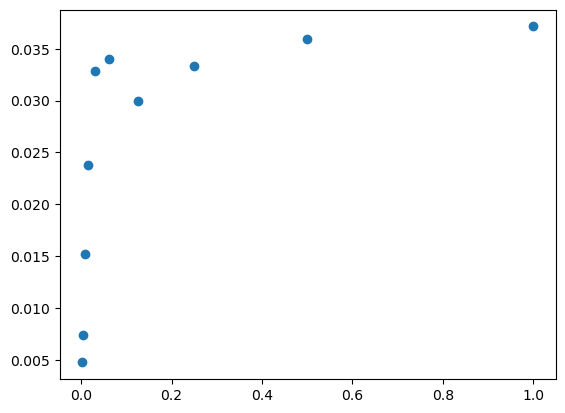

In [32]:
xdata = rates_df["[pNPA] (mM)"]
ydata = rates_df["initial_velocities"]
plt.plot(xdata, ydata, "o")

In [33]:
def mm_eq(sub_conc, vmax, km):
    vi = (vmax * sub_conc)/(km + sub_conc)
    return vi

In [34]:
mm_eq(rates_df["[pNPA] (mM)"], 100, 1)        # output not needed in upcoming codes

0    50.000000
1    33.333333
2    20.000000
3    11.111111
4     5.882353
5     3.030303
6     1.538462
7     0.775194
8     0.389105
9     0.194932
Name: [pNPA] (mM), dtype: float64

In [36]:
popt, pcov = curve_fit(mm_eq, xdata, ydata)

In [38]:
import numpy as np

In [44]:
Vmax = popt[0]
Km = popt[1]
stdev = np.sqrt(np.diag(pcov))
print(f"Vmax for this reaction: {Vmax:.6f} +/- {stdev[0]:.6f}")
print(f"Km for this reaction: {Km:.6f} +/- {stdev[1]:.6f}")

Vmax for this reaction: 0.036676 +/- 0.001491
Km for this reaction: 0.009723 +/- 0.001973


Text(0, 0.5, 'Velocity')

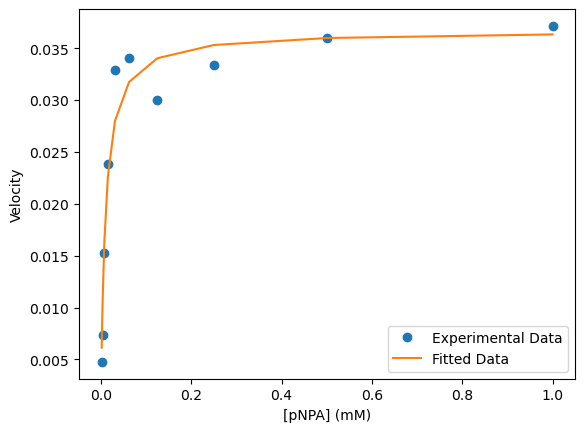

In [47]:
fitted_y = mm_eq(xdata, Vmax, Km)

plt.plot(xdata, ydata, "o", label = "Experimental Data")
plt.plot(xdata, fitted_y, "-", label = "Fitted Data")
plt.legend()
plt.xlabel("[pNPA] (mM)")
plt.ylabel("Velocity")

Text(0, 0.5, 'Velocity')

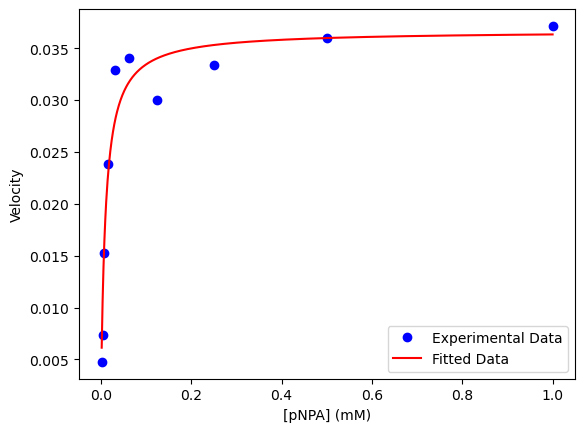

In [48]:
# To generate a smoother fitted curve
smooth_x = np.linspace(np.min(xdata), np.max(xdata), 1000)
smooth_y = mm_eq(smooth_x, Vmax, Km)

plt.plot(xdata, ydata, "bo", label = "Experimental Data")
plt.plot(smooth_x, smooth_y, "r-", label = "Fitted Data")
plt.legend()
plt.xlabel("[pNPA] (mM)")
plt.ylabel("Velocity")